# **PROJETO - ANÁLISE ESTATÍSTICA DE EXPECTATIVA DE VIDA**

FONTE: https://databank.worldbank.org/indicator/SP.DYN.LE00.IN/1ff4a498/Popular-Indicators#

## **CONECTAR COM O GOOGLE DRIVE PARA CAPTAR OS BANCOS DE DADOS**

In [373]:
# conecta o colab ao google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **IMPORTS DE BIBLIOTECAS**

###BIBLIOTECA DE ANÁLISE DE TEMPO DE EXECUÇÃO DO SCRIPT

In [374]:
# Cronometra o tempo de execução do programa

import time
start_script = time.time()

###BIBLIOTECAS RESTANTES

In [375]:
# Importa as bibliotecas necessárias

from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import normaltest


##**FUNÇÕES**

In [376]:
def ler_csv(name_csv):
  df = pd.read_csv(bd_local + '/' + name_csv, header=0, sep = ',', skiprows=0, decimal='.')
  return df

In [377]:
def formatar_titulo(text):
  words = text.split(" ")
  total_string = ""
  for counter, word in enumerate(words):
    if counter>0 and counter % 5 == 0:
      total_string +="\n{}".format(word)
    else:
      total_string +=" {}".format(word)
  return total_string.lstrip()

##**CAPTAÇÃO DE DADOS**

In [378]:
bd_local = '/content/drive/MyDrive/..Python_Codes/Projeto_Statistic_Analysis_01/BD'
bd_geral = '/content/drive/MyDrive/..Python_Codes/Projeto_Statistic_Analysis_01/'
df = ler_csv('d9d3ffb1-daa6-4e67-a48f-a12aa3d2c776_Data.csv')
df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Afghanistan,AFG,55.841,56.308,56.784,57.271,57.772,58.29,58.826,59.375,59.93,60.484,61.028,61.553,62.054,62.525,62.966,63.377
1,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Albania,ALB,73.955,74.288,74.579,74.828,75.039,75.228,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
2,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Algeria,DZA,70.64,71.116,71.605,72.101,72.594,73.072,73.521,73.936,74.311,74.644,74.938,75.199,75.436,75.661,75.878,76.09
3,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


## **TRATAMENTO DE DADOS**

In [379]:
try:
  df.drop('Series Name',  axis='columns', inplace=True)    # remove colunas desnecessárias
  df.drop('Series Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
  df.drop('Country Code',  axis='columns', inplace=True)    # remove colunas desnecessárias
except:
  pass

# transposição
# df = df.transpose()                                       # transpõe o dataframe para facilitar a visualização
# new_header = df.iloc[0]                                   #grab the first row for the header
# df = df[1:]                                               #take the data less the header row
# df.columns = new_header                                   #set the header row as the df header

# renomear colunas
df.columns = ['País', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

# Remove NaN:
df.replace('..', np.nan, inplace=True)
df = df[df['País'].notna()]
df

,País,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,55.841,56.308,56.784,57.271,57.772,58.29,58.826,59.375,59.93,60.484,61.028,61.553,62.054,62.525,62.966,63.377
1,Albania,73.955,74.288,74.579,74.828,75.039,75.228,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025
2,Algeria,70.64,71.116,71.605,72.101,72.594,73.072,73.521,73.936,74.311,74.644,74.938,75.199,75.436,75.661,75.878,76.09
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),76.619512195122,77.6219512195122,77.5219512195122,77.5219512195122,77.7731707317073,77.4219512195122,78.3243902439024,76.8634146341463,77.1634146341463,77.5146341463415,77.8658536585366,78.3170731707317,78.5170731707317,78.7170731707317,78.8682926829268,79.0170731707317
213,West Bank and Gaza,71.022,71.239,71.447,71.648,71.842,72.028,72.203,72.366,72.517,72.656,72.788,72.915,73.041,73.17,73.303,73.442
214,"Yemen, Rep.",60.683,61.216,61.781,62.358,62.931,63.481,63.997,64.47,64.892,65.255,65.549,65.768,65.92,66.016,66.066,66.085
215,Zambia,44,44.615,45.4,46.322,47.354,48.496,49.757,51.134,52.606,54.13,55.655,57.126,58.502,59.746,60.831,61.737


In [380]:
# passando os valores do datafame de 'string' para 'float':
try:
  df.drop('País',  axis='columns', inplace=True)    # remove colunas desnecessárias
except:
  pass
df = df.astype(float)

In [381]:
# criação de dataframe de resumo dos dados:
lista_index = list(range(2000,2015))
lista_media = []
lista_dp = []
lista_num_amostras = []

for n in range(1, len(df.columns)):
  lista_media.append(df[df.columns[n]].mean())
  lista_dp.append(df[df.columns[n]].std())
  lista_num_amostras.append(df[df.columns[n]].count())

df_resumo = pd.DataFrame({'Ano': lista_index, 
                         'Média':lista_media, 
                         'Desvio Padrão': lista_dp,
                          'Amostras': lista_num_amostras})

df_resumo["Variabilidade (%)"] = 100*df_resumo['Desvio Padrão']/df_resumo['Média']

### TESTE T

In [390]:
significancia = 0.05  # 95% de confiabilidade

normaltest(df['2000'].dropna()) # retorna a estatistica de teste e o p-valor (precisa remover os NaN)

NormaltestResult(statistic=20.302183620163575, pvalue=3.9033441297610966e-05)

### TESTE F

##**RESULTADOS**

###**GERAÇÃO DE GRÁFICOS**


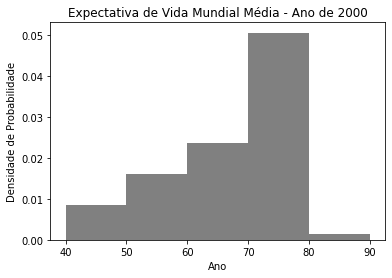

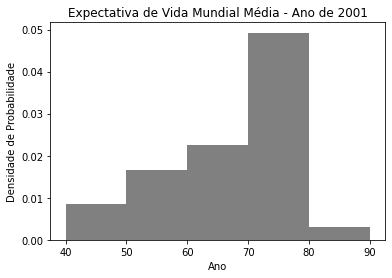

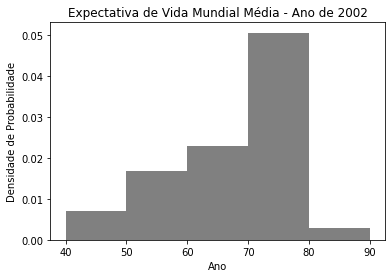

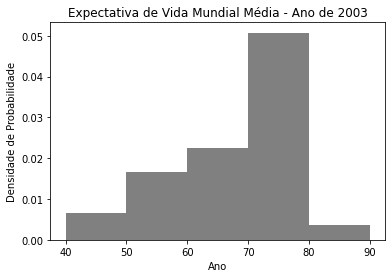

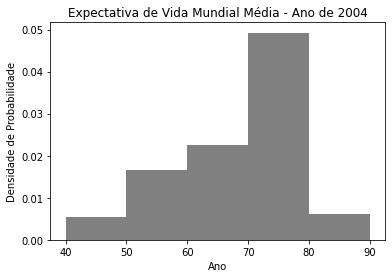

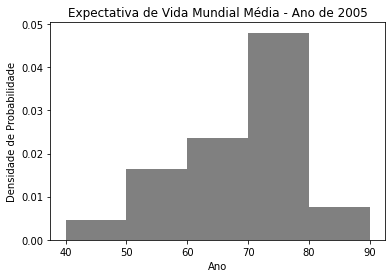

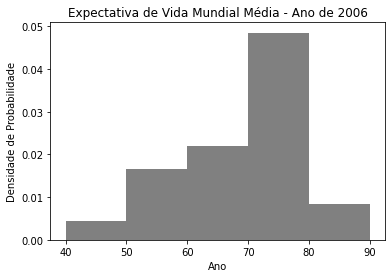

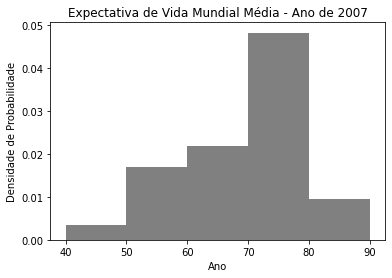

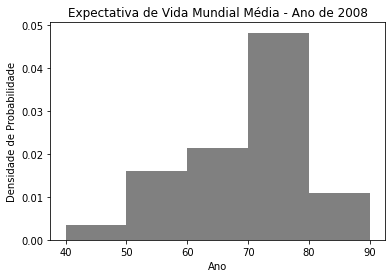

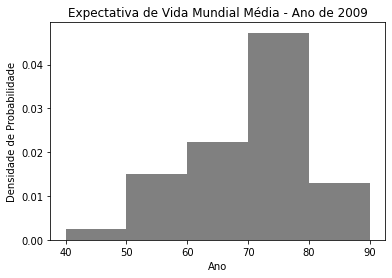

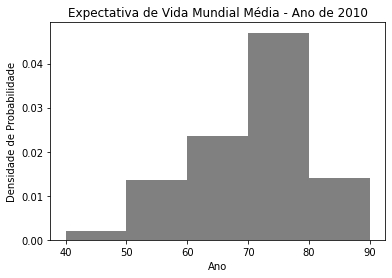

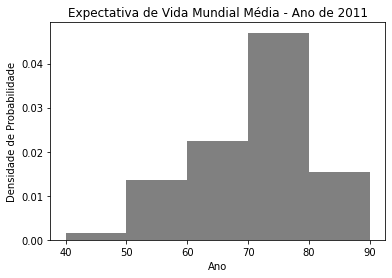

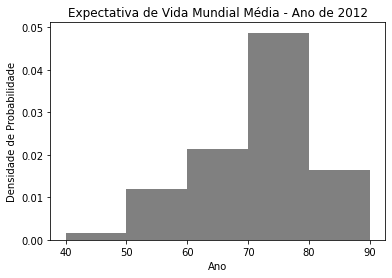

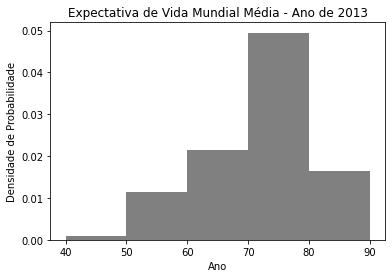

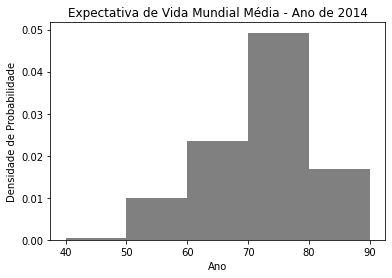

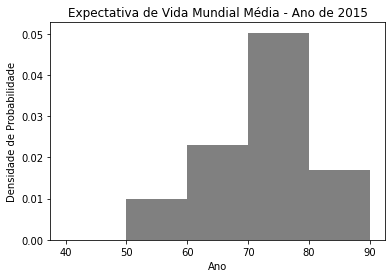

In [383]:
for i in df.columns:
  if i == 'País':
    pass
  else:
    fig, ax = plt.subplots()
    ax.hist(df[i], bins=5, density=True, color='gray',histtype = 'bar',range = (40, 90))

    ax.set_title("Expectativa de Vida Mundial Média - Ano de " + str(i))
    ax.set_ylabel('Densidade de Probabilidade')
    ax.set_xlabel('Ano')
    fig.savefig(bd_geral + "Imagens/histograma_expectativa_de_vida_anos_" + str(i) + ".png", dpi=300)  

###**GERAÇÃO DE TABELAS**

In [385]:
df_resumo

,Ano,Média,Desvio Padrão,Amostras,Variabilidade (%)
0,2000,67.298502,10.174293,199,15.118157
1,2001,67.657505,10.092499,202,14.917042
2,2002,67.828434,10.042258,199,14.805381
3,2003,68.205597,9.998906,199,14.659949
4,2004,68.500380,9.816476,200,14.330543
5,2005,68.887950,9.671922,200,14.040078
6,2006,69.264434,9.446060,201,13.637677
7,2007,69.649938,9.241530,201,13.268541
8,2008,70.039018,9.020295,201,12.878957
9,2009,70.410467,8.851010,200,12.570589


In [386]:
df_resumo.to_excel(bd_geral + "Planilhas/resumo.xlsx")  

## **FINALIZAÇÃO DO SCRIPT**

In [387]:
# Cronometra o tempo de execução do programa

end_script = time.time()
print('Tempo do script {:.2f} segundos'.format((end_script - start_script)))

Tempo do script 9.84 segundos
